Parsed DataFrame:
                          File  Start Address  End Address  Memory Used  \
0   inputs/test_16MB_mixed.txt              0          206          207   
1   inputs/test_16MB_mixed.txt            207          475          269   
2   inputs/test_16MB_mixed.txt            476        16383        15908   
3        inputs/test_4MB_B.txt              0          284          285   
4        inputs/test_4MB_B.txt            285          618          334   
..                         ...            ...          ...          ...   
81   inputs/test_8MB_mixed.txt            863         1175          313   
82   inputs/test_8MB_mixed.txt           1176         1560          385   
83   inputs/test_8MB_mixed.txt           1561         1744          184   
84   inputs/test_8MB_mixed.txt           1745         1859          115   
85   inputs/test_8MB_mixed.txt           1860         8191         6332   

   Process  
0       P5  
1      P10  
2   Unused  
3       P2  
4       P3  
.. 

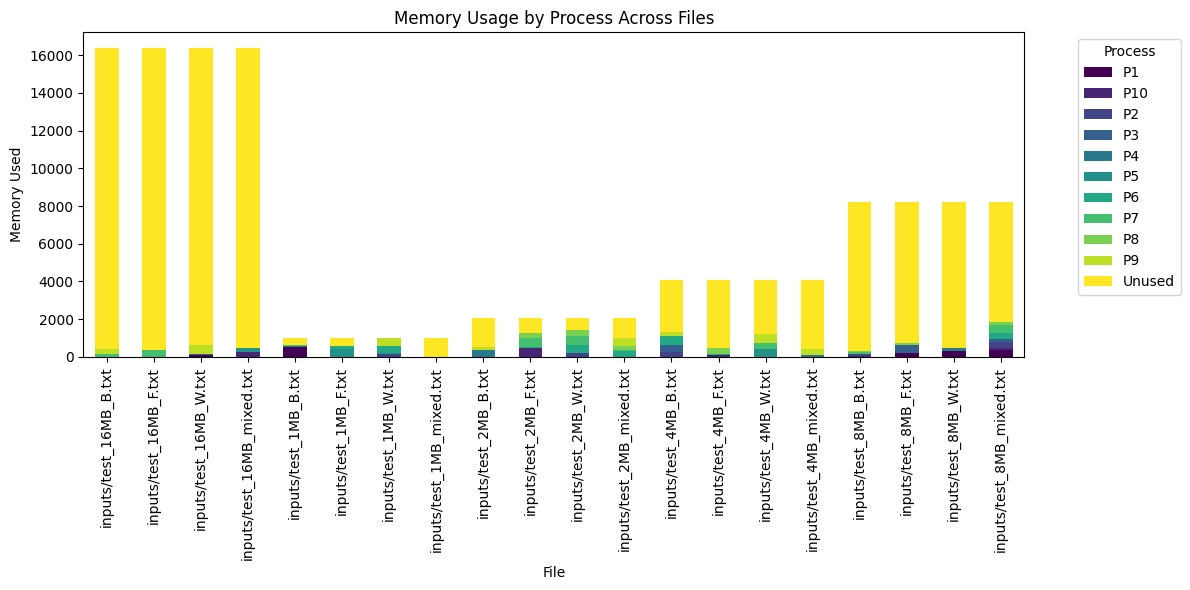

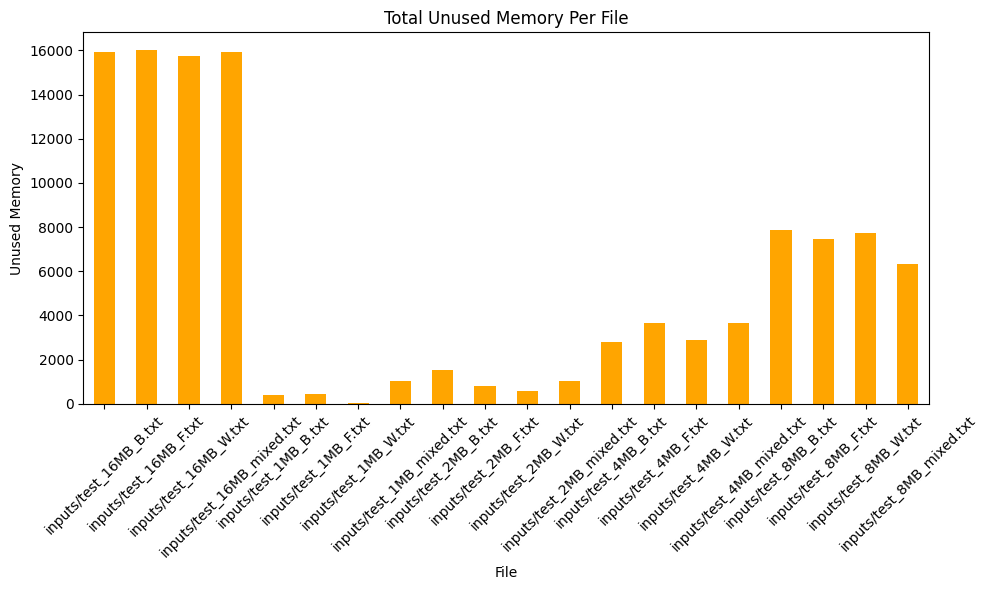

Analysis Summary:
                          File  Total Memory  Unused Memory  Unused Percentage
0       inputs/test_16MB_B.txt         16384          15944          97.314453
1       inputs/test_16MB_F.txt         16384          16017          97.760010
2       inputs/test_16MB_W.txt         16384          15738          96.057129
3   inputs/test_16MB_mixed.txt         16384          15908          97.094727
4        inputs/test_1MB_B.txt          1024            393          38.378906
5        inputs/test_1MB_F.txt          1024            418          40.820312
6        inputs/test_1MB_W.txt          1024             30           2.929688
7    inputs/test_1MB_mixed.txt          1024           1018          99.414062
8        inputs/test_2MB_B.txt          2048           1522          74.316406
9        inputs/test_2MB_F.txt          2048            798          38.964844
10       inputs/test_2MB_W.txt          2048            598          29.199219
11   inputs/test_2MB_mixed.txt    

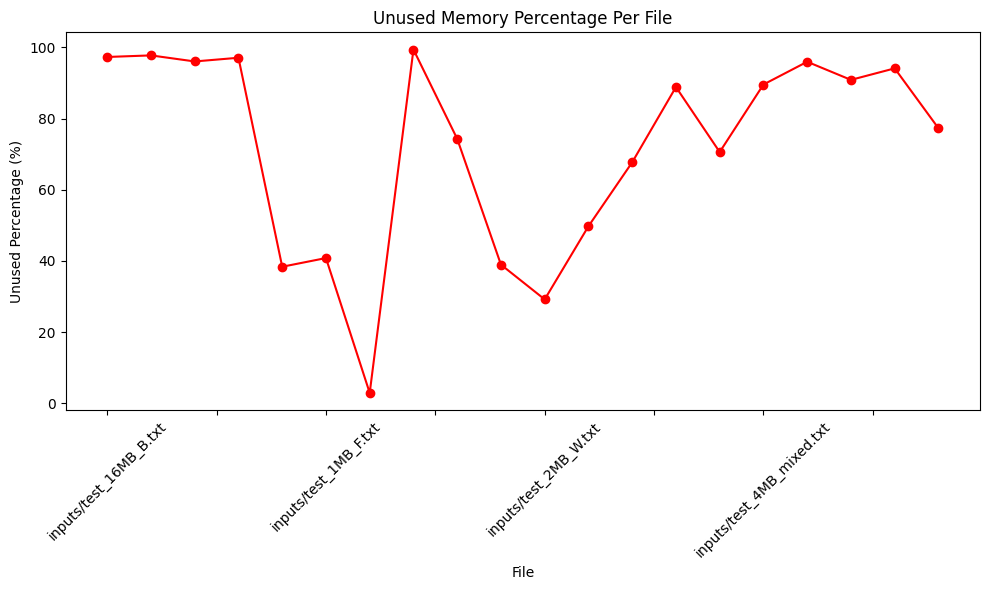

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to parse the memory status from the file
def parse_memory_status(file_path):
    data = []
    current_file = ""

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith("Processing file:"):
                # Extract the current file name
                current_file = line.split(":")[1].strip()
            elif line.startswith("Addresses"):
                # Extract the memory block information
                parts = line.split()
                start_addr, end_addr = map(int, parts[1][1:-1].split(":"))
                process = parts[-1]
                data.append({
                    "File": current_file,
                    "Start Address": start_addr,
                    "End Address": end_addr,
                    "Memory Used": end_addr - start_addr + 1,
                    "Process": process
                })
    return pd.DataFrame(data)

# Function to generate graphs and analysis
def generate_reports(df):
    # 1. Group by file and process, sum memory usage
    memory_usage = df.groupby(['File', 'Process'])['Memory Used'].sum().unstack(fill_value=0)

    # Plotting memory usage for each file
    memory_usage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
    plt.title("Memory Usage by Process Across Files")
    plt.xlabel("File")
    plt.ylabel("Memory Used")
    plt.legend(title="Process", bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

    # 2. Filter for Unused memory and calculate total per file
    unused_memory = df[df['Process'] == 'Unused'].groupby('File')['Memory Used'].sum()

    # Plot unused memory
    unused_memory.plot(kind='bar', color='orange', figsize=(10, 6))
    plt.title("Total Unused Memory Per File")
    plt.xlabel("File")
    plt.ylabel("Unused Memory")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 3. Calculate total memory and unused memory percentages per file
    total_memory = df.groupby('File')['Memory Used'].sum()
    unused_percentage = (unused_memory / total_memory) * 100

    # Display summary statistics
    analysis_df = pd.DataFrame({
        "Total Memory": total_memory,
        "Unused Memory": unused_memory,
        "Unused Percentage": unused_percentage
    }).reset_index()

    print("Analysis Summary:")
    print(analysis_df)

    # 4. Plot unused percentage
    unused_percentage.plot(kind='line', marker='o', color='red', figsize=(10, 6))
    plt.title("Unused Memory Percentage Per File")
    plt.xlabel("File")
    plt.ylabel("Unused Percentage (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main function to run the entire program
def main():
    # Replace with the actual file path
    results_file = "memory_stats.txt"  # Change this to your actual file path
    df = parse_memory_status(results_file)

    # Display the DataFrame
    print("Parsed DataFrame:")
    print(df)

    # Generate reports and analysis
    generate_reports(df)

# Run the program
if __name__ == "__main__":
    main()
